# Milestone 2

## Task 1 & 2:

In [23]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [24]:
#Load and Process Data from Scripts
import sys
sys.path.append("..")
from scripts import project_functions
df = project_functions.load_and_process("C:\\Users\\thoma\\Desktop\\Data301\\Project\\project-group33\\data\\raw\\SharkAttacks_update.csv")
df

,Year,Type,Country,Area,Activity,Sex,Fatal
0,2018.0,Boating,USA,California,Paddling,F,False
1,2018.0,Unprovoked,USA,Georgia,Standing,F,False
2,2018.0,Invalid,USA,Hawaii,Surfing,M,False
3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,False
4,2018.0,Provoked,MEXICO,Colima,Free diving,M,False
...,...,...,...,...,...,...,...
6086,1804.0,Boat,AUSTRALIA,New South Wales,NaN,NaN,False
6087,1803.0,Sea Disaster,USA,South Carolina,NaN,M,False
6088,1803.0,Unprovoked,AUSTRALIA,Western Australia,NaN,M,False
6089,1802.0,Unprovoked,INDIA,NaN,NaN,NaN,True


## Task 3:

In [25]:
from pandas_profiling import ProfileReport
ProfileReport(df).to_notebook_iframe()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The profile report aided my brainstorming in discovering what potential research questions could be and in my EDA, I am showing three different visualizations. The first is a distribution for attacks by year. The next is an attack count for the top 10 countries. The third visualization is regarding fatalities attacks per year again, but this time there is a distribution for whether the attack was fatal or not. Lastly, I barplotted the attack count for the top 5 reported activities. On Tableau, I want to have a world map where I include the density of attacks per region.  

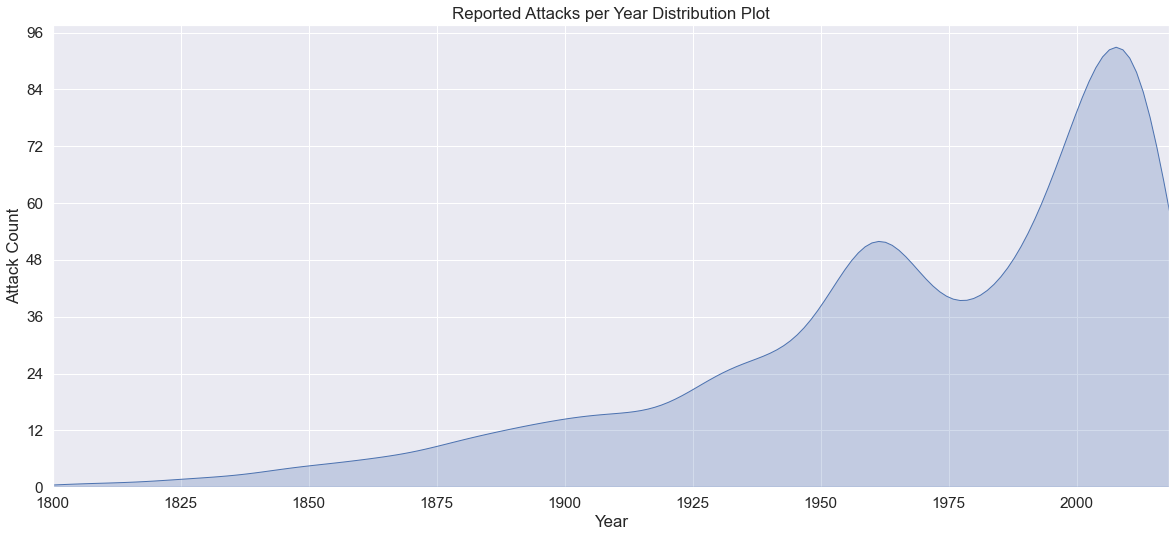

In [54]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(20, 8.5))
 
# density plot with shaded area with kdeplot 'shade' parameter
EDA1 = sns.kdeplot(df['Year'], shade=True)
plt.title("Reported Attacks per Year Distribution Plot")
plt.ylabel("Attack Count")
plt.xlim([1800, 2018])
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*6091*0.98505992447))
EDA1.yaxis.set_major_formatter(ticks_y)
plt.show(EDA1)

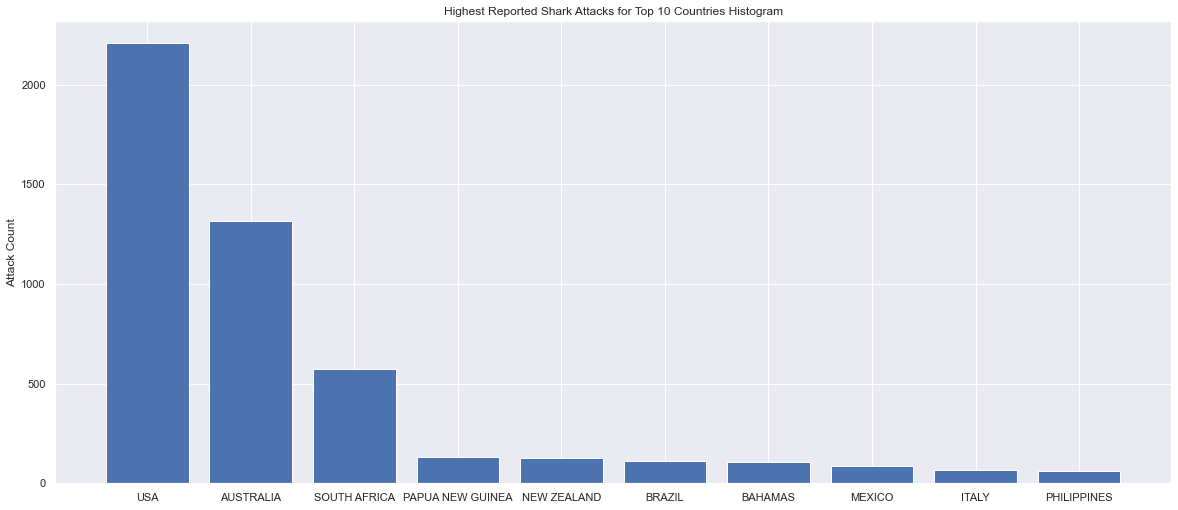

In [53]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 8.5))
import operator
from collections import Counter
a = Counter(df['Country'])
A = dict(a)
newA = dict(sorted(A.items(), key=operator.itemgetter(1), reverse=True)[:10])

EDA2 = plt.bar(list(newA.keys()), list(newA.values()))
plt.title("Highest Reported Shark Attacks for Top 10 Countries Histogram")
plt.ylabel("Attack Count")
plt.show(EDA2)

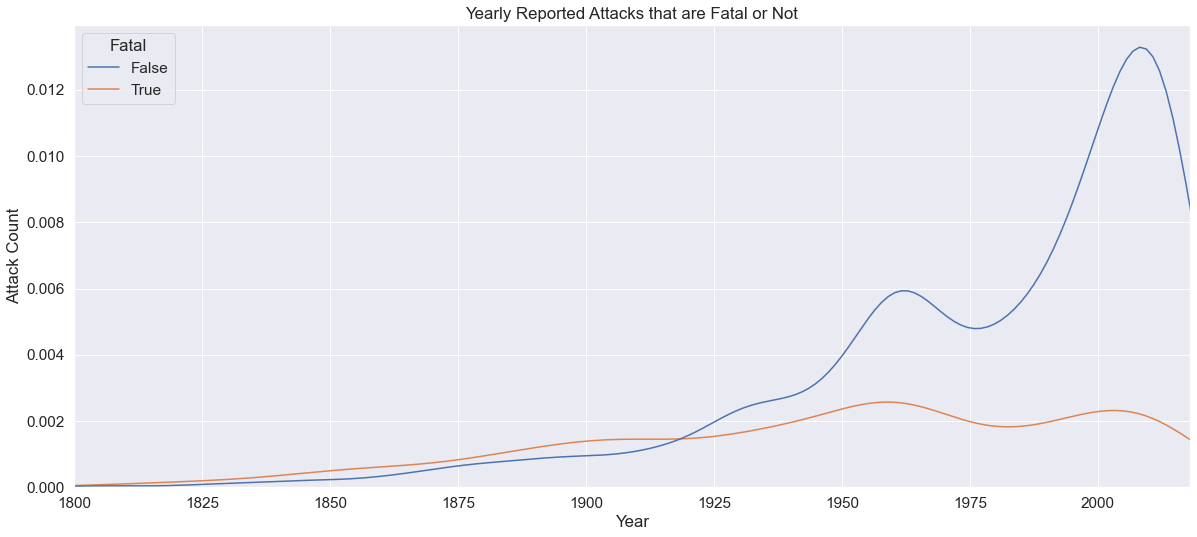

In [52]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(20, 8.5))

EDA3 = sns.kdeplot(x="Year", hue="Fatal", data=df) 

plt.title("Yearly Reported Attacks that are Fatal or Not")
plt.ylabel("Attack Count")
plt.xlim([1800, 2018])
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*6091*0.98505992447))
EDA1.yaxis.set_major_formatter(ticks_y)

plt.show(EDA3)

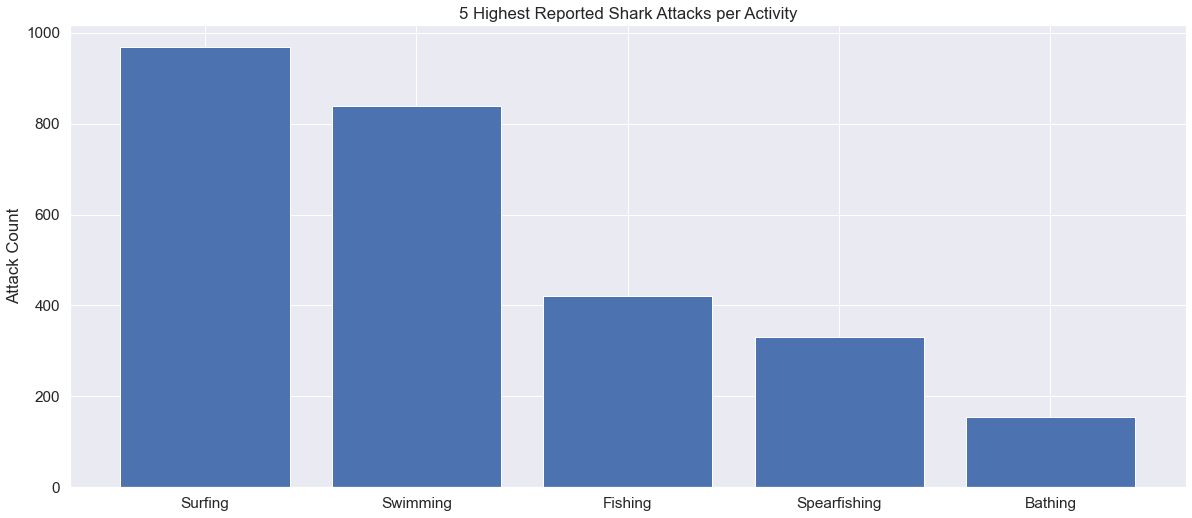

In [55]:
sns.set(style="darkgrid", font_scale=1.4)
plt.figure(figsize=(20, 8.5))
a = Counter(df['Activity'])
A = dict(a)
A = {k: v for k, v in A.items() if k == k}
newA = dict(sorted(A.items(), key=operator.itemgetter(1), reverse=True)[:5])
newA
EDA4 = plt.bar(list(newA.keys()), list(newA.values()))
plt.title("5 Highest Reported Shark Attacks per Activity")
plt.ylabel("Attack Count")
plt.show(EDA4)

## Task 4:

What I found from Analysis is that the most attacks have been reported within this century, specifically many were reported in the 2000s. This makes sense as records of shark attacks weren't kept as tightly in the past and since population is increasing and interest in swimming and surfing grows. My next research question regarding which countries reported the most attacks came back as USA, then Australia, then South Africa. Lastly, I discovered that surfing, swimming, and fishing topped the list for activities at time of the attack.

I came up with a plan for my Tableau dashboard. It will include a map with locations of the attack, attack count per year, and attack count per activity. The sex of the victim as well as whether the attack was fatal or not will both be included filters to provide more options for the data. One challenge I overcame was when I converted the 'Fatal (Y/N)' column to a boolean variable. The upcoming challenges will be to find latitidue and longitude for country/area and to decide what to do with some of the NaNs that are still present.

# Thank you for remarking my Milestone 2!!